# Drone Image Test

In [1]:
from drone_lib import *
%matplotlib inline

/home/ai2-jedi/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Specify Image, Working Directory, and Model Files

In [2]:
#This is the directory of the construction site folder containing all the tif files. 
#Then specify the name of the tif file you would like to test
raw_data_root = '/home/ai2-jedi/Desktop/'
image_name = 'abcd.tif'

#This is the where you want your cropping, segmentation output, and heatmap output to be saved
output_root = '/home/ai2-jedi/Desktop/drone_test/'

#This is the difectory where the caffe model and deploy files exists
model_files_root = '/media/ai2-jedi/data_disk/data_sets/drone_output_standard/'
caffemodel = 'Case3_Cars_ReinF_filtered_20160901_iter_120000.caffemodel'
deploy = 'deploy18.prototxt'

#Image name cleaned
tif_nm = image_name[:-4]

#Create the network based on your caffe and deploy files
DEVICE_GPU = 1
caffe.set_device(DEVICE_GPU)
caffe.set_mode_gpu()
net = caffe.Net(model_files_root + deploy ,model_files_root + 'weights/' + caffemodel,caffe.TEST)

### Load and Crop Image

In [3]:
createTestDirectories(output_root,raw_data_root,tif_nm)
width, height, channel, imarray, raster = loadTif(raw_data_root, image_name)
cropImage(image_name, imarray, height, width)

/home/ai2-jedi/Desktop/drone_test/cropped_images/abcd/
Done. Total images cropped: 1134


### Pass Image Through Model

In [4]:
test_files = os.listdir(output_root +  'cropped_images/' +  tif_nm)
classify(test_files,net,output_root)

Done. Total images cropped: 1134


# Stitch Image Together

### Show Original Image

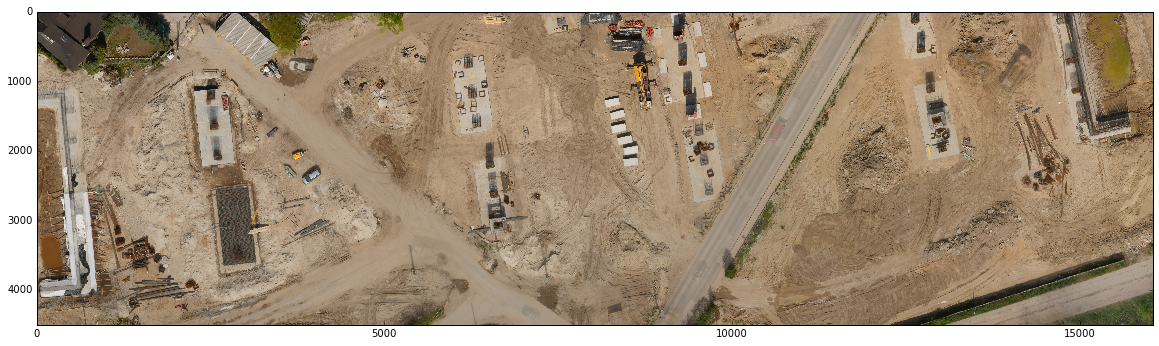

In [5]:
im = Image.open(raw_data_root + image_name)
plt.figure(figsize=(20,20))
plt.imshow(im)

### Show Segmented Image

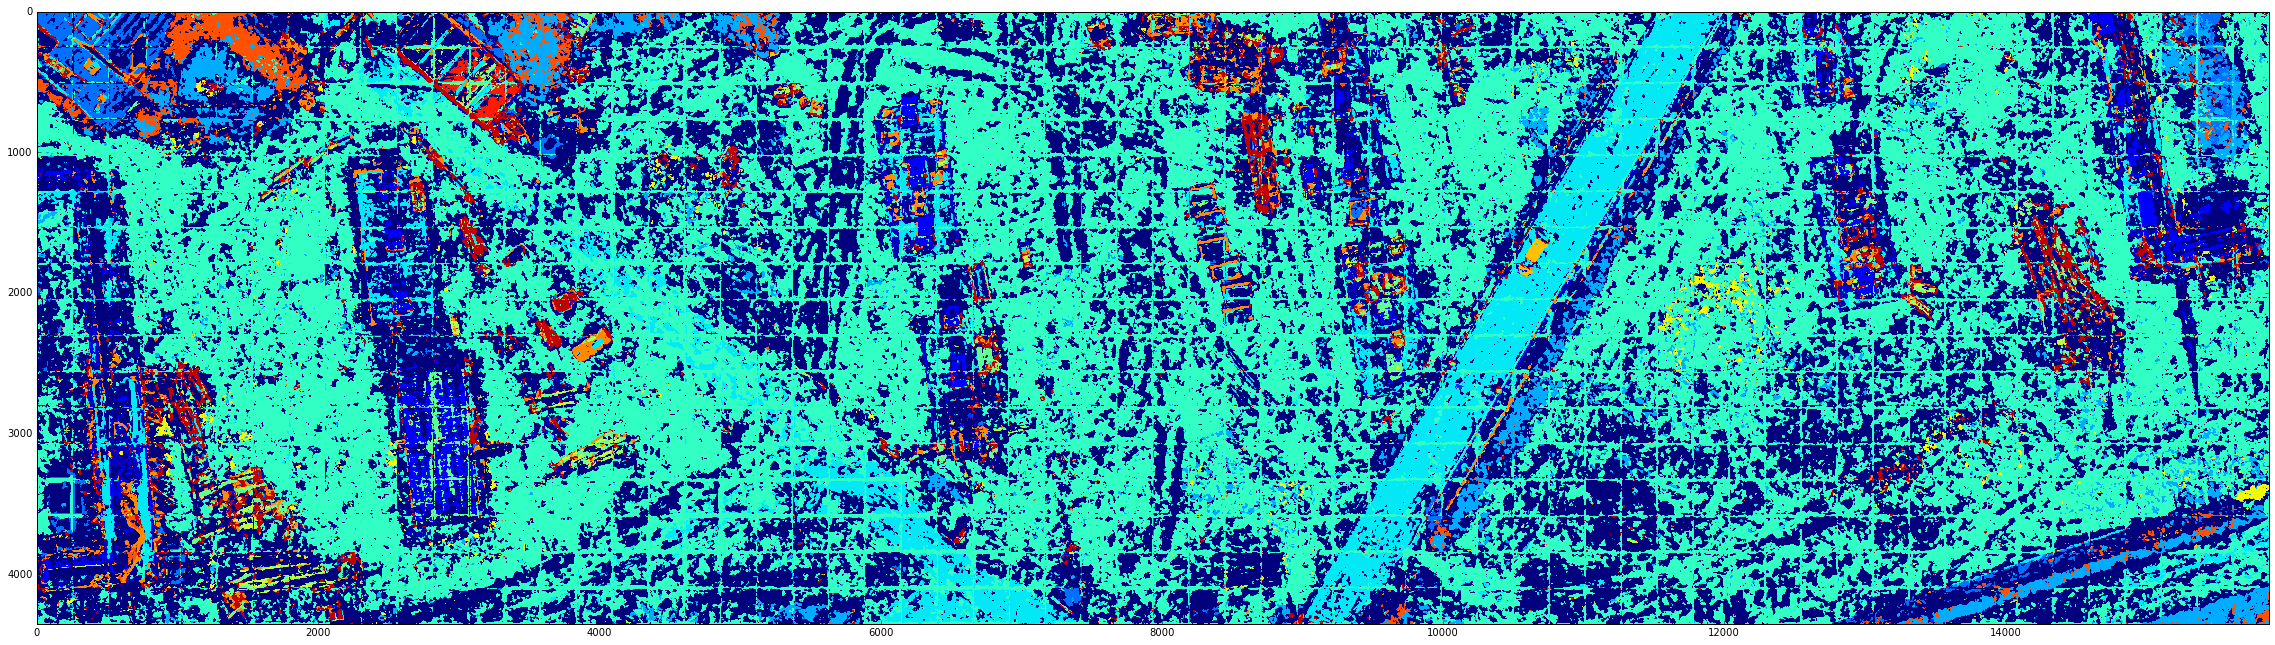

In [6]:
new_im = stichImage(output_root, tif_nm)
new_im.save(output_root  + 'final_results/segmented_output.png')
plt.figure(figsize=(40,40))
plt.imshow(new_im)

### Show Heatmap Image